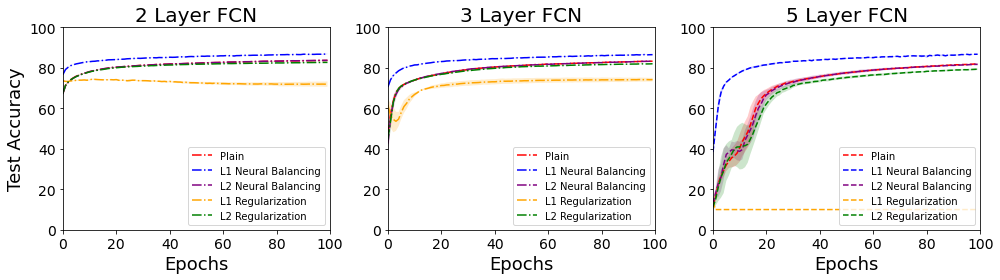

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle 

fig, axs = plt.subplots(1,3, figsize = (14,4), layout='tight')
sizes = ['small_fcn', 'medium_fcn', 'large_fcn']
method = ['Clean', 'L1NB', 'L2NB', 'L1Regularization', 'L2Regularization']

colors = ['red', 'blue', 'purple', 'orange', 'green']

titles = ['Plain', 'L1 Neural Balancing', 'L2 Neural Balancing', 'L1 Regularization', 'L2 Regularization']


for row in range(3):
    if row == 2:
        for col in range(5):
            arr=[]
            arr = []
            max_length = 0
            for iteration in range(5):
                df = pd.read_csv(f'../FMNIST-FCN/hist/{sizes[row]}/{sizes[row]}-{method[col]}-{iteration}-fbAtStart-{1}-SGD.csv')
                test_acc = df['test_accuracy'].values
                arr.append(test_acc)
                if len(test_acc) > max_length:
                    max_length = len(test_acc)

            arr = [np.pad(a, (0, max_length - len(a)), 'constant', constant_values=np.nan) for a in arr]
            arr = np.array(arr)
            mean = np.nanmean(arr, axis=0)
            std = np.nanstd(arr, axis=0)
            eps = np.arange(mean.shape[0])
            axs[row].plot(eps, mean, colors[col], linestyle = '--', label = titles[col])
            axs[row].fill_between(eps, mean-std, mean+std, alpha=0.2, facecolor = colors[col])
            axs[0].set_ylabel('Test Accuracy', fontsize = 18)
            axs[row].set_xlabel('Epochs', fontsize = 18)
            axs[row].set_yticks(np.arange(0, 101, 20))
            axs[row].set_xticks(np.arange(0, 101, 20))
            axs[row].tick_params(axis='x', labelsize=14)
            axs[row].tick_params(axis='y', labelsize=14)
            axs[row].set_title('5 Layer FCN', fontsize = 20)
            axs[row].set_xlim(0, 100)
            axs[row].set_ylim(0, 100)
            axs[row].legend(loc = 'lower right')
            if col == 0:
                axs[row].set_title(f'{method[col]} {max(mean)}', fontsize = 20)
            # axs[row].set_title(max(mean))
            # print(f'{method[col]}: {np.max(mean)}')
    else:
        for col in range(5):
            arr=[]
            max_length = 0
            for iteration in range(5):
                df = pd.read_csv(f'../FMNIST-FCN/hist/{sizes[row]}/{sizes[row]}-{method[col]}-{iteration}-fbAtStart-{1}-SGD.csv')
                test_acc = df['test_accuracy'].values
                arr.append(test_acc)
                if len(test_acc) > max_length:
                    max_length = len(test_acc)
            arr=np.array(arr)
            mean = np.mean(arr, axis = 0)
            std = np.std(arr, axis=0)
            eps = np.arange(mean.shape[0])
            axs[row].plot(eps, mean, colors[col], linestyle = '-.', label = titles[col])
            axs[row].fill_between(eps, mean-std, mean+std, alpha=0.2, facecolor = colors[col])
            # axs[row].set_ylabel('Test Accuracy', fontsize = 18)
            axs[row].set_xlabel('Epochs', fontsize = 18)
            axs[row].set_yticks(np.arange(0, 101, 20))
            axs[row].set_xticks(np.arange(0, 501, 20))
            axs[row].tick_params(axis='x', labelsize=14)
            axs[row].tick_params(axis='y', labelsize=14)
            axs[row].set_xlim(0, 100)
            axs[row].set_ylim(0, 100)
            if row == 0:
                axs[row].set_title('2 Layer FCN', fontsize = 20)
            if row == 1:
                axs[row].set_title('3 Layer FCN', fontsize = 20)
            axs[row].legend(loc = 'lower right')

            # print(f'{method[col]}: {np.max(mean)}')

plt.show()